![Lights!Camera!Action](Movie_photo.jpg)

---
# BOX Office Movies Analysis
---

## Overview
This project analyzes data from multiple sources listed in the [zipped file](zippedData).


## Business Problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

---
## Data Understanding
---

The data that is being used has been sourced from different platforms and contains information such as:
- Movie titles
- Movie Genres
- Runtime (Length of the movie)
- Production costs
- Gross income made
- Ratings

With this data we can make conclusions regarding what types of films to create based on consumer preference(rating), production costs and the income made from production in order to answer the business problem. 

### Loading the data into dataframes

In [39]:
#importing necesarry libraries
import pandas as pd
import numpy as np 
import sqlite3

In [40]:
# Specify the file path
file_path = "zippedData/rt.movie_info.tsv.gz"

# Load the data into a DataFrame
movie_info = pd.read_csv(file_path, compression='gzip', sep='\t')

movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [41]:
# Specify the file path
file_path = "zippedData/tmdb.movies.csv.gz"

# Load the data into a DataFrame
tmbd_movies = pd.read_csv(file_path, compression='gzip')

tmbd_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [42]:
# Specify the file path
file_path = "zippedData/tn.movie_budgets.csv.gz"

# Load the data into a DataFrame
tmbd_movies = pd.read_csv(file_path, compression='gzip')

tmbd_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [43]:
tmbd_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### Movies ERD

![movies erd](movie_data_erd.jpeg)

In [44]:
#load the movie_basics data into a dataframe
#unzip the file
import zipfile

with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
  # Extract all files (assuming the database file is the only one)
  zip_ref.extractall()

# Connect to the SQLite database
conn = sqlite3.connect('im.db')

# Load the tables into a DataFrame
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Close the database connection
conn.close()

movie_basics.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [45]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [46]:
#load the movie_ratings data into a dataframe
# Connect to the SQLite database
conn = sqlite3.connect('im.db')

# Load the tables into a DataFrame
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Close the database connection
conn.close()

movie_ratings.head()


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [47]:
#delete the 'im.db' file, it is too large and only needed for one use. 
import os
file_path = "im.db"

try:
    os.remove(file_path)
    print("File deleted successfully!")
except OSError as e:
    print(f"Error deleting file: {e}")

File deleted successfully!


In [48]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


---
## Data Preparation
---

### Data Cleaning

In [51]:
#cleaning the movies_info dataframe

#specify necesary columns
cols = ['id', 'genre', 'runtime', 'theater_date', 'dvd_date', 'rating']
movie_info = movie_info[cols]

#create a function to parse date strings
def extract_year(date_string):
  """Extracts the year from a date string and returns it as an integer."""
  if not isinstance(date_string, str):
    return None
  else:
    stripped = date_string.strip()  # Remove leading/trailing white space
    year_str = stripped[-4:]  # Extract the last 4 characters
    year_int = int(year_str)  # Convert the string to an integer
    return year_int
date_cols = ['theater_date', 'dvd_date']
movie_info[date_cols] = movie_info[date_cols].map(lambda x: extract_year(x))
#store only the year values in the date columns


#convert runtime column into integer
movie_info['runtime'] = movie_info['runtime'].str.replace('minutes', '')
movie_info['runtime'] = movie_info['runtime'].str.strip()
movie_info['runtime'] = pd.to_numeric(movie_info['runtime'], errors='coerce')

#split the genre column into a list of genres
movie_info['genre1'] = movie_info['genre'].str.split('|').str[0]

#drop nan values in genre1 column
movie_info = movie_info.dropna(subset=['genre1'])
#remove original genre column
movie_info.drop('genre', axis=1, inplace=True)


movie_info.head()

C:\Users\CINDY\AppData\Local\Temp\ipykernel_9620\2631541388.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  movie_info[date_cols] = movie_info[date_cols].applymap(lambda x: extract_year(x))


,id,runtime,theater_date,dvd_date,rating,genre1
0,1,104.0,1971.0,2001.0,R,Action and Adventure
1,3,108.0,2012.0,2013.0,R,Drama
2,5,116.0,1996.0,2000.0,R,Drama
3,6,128.0,1994.0,1997.0,R,Drama
4,7,200.0,NaN,NaN,NR,Drama


In [52]:
#clean the 'tmbd_movies' dataframe
#Converting money columns into integers
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
#remove punctuation signs from all money columns
tmbd_movies[money_cols] = tmbd_movies[money_cols].replace(',', '', regex=True)
tmbd_movies[money_cols] = tmbd_movies[money_cols].replace('\$', '', regex=True)

#convert all money columns into integers
tmbd_movies[money_cols] = tmbd_movies[money_cols].apply(pd.to_numeric)


In [53]:
#clean the 'movie_basics' dataframe
#drop rows with missing values
movie_basics.dropna(inplace=True)
#split the genres into multiple columns
movie_basics['genre1']= movie_basics['genres'].str.split(',', expand=True)[0]

#drop the original genres column
movie_basics.drop(columns=['genres'], inplace=True)


In [54]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genre1           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [99]:
movie_basics.primary_title.duplicated().sum()

6754

## Feature Generation 

Generate a new feature called ROI- Return on investments that measures the profitability of the movie.

In [55]:
#Generate ROI  column 
tmbd_movies['ROI'] = (tmbd_movies['worldwide_gross'] - tmbd_movies['production_budget']) / tmbd_movies['production_budget']

## Merging Dataframes

In [56]:
# merge the movie_basics and movie_ratings dataframes
# Merge the DataFrames
movie_data = pd.merge(movie_basics, movie_ratings, on='movie_id')
movie_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genre1,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy,6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,Adventure,8.1,263


In [57]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65720 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genre1           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


In [58]:
#merge the movies_info dataframe ad the tmbd_movies dataframe
cost_info = pd.merge(tmbd_movies, movie_info, on='id')

cost_info.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,runtime,theater_date,dvd_date,rating,genre1
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577,104.0,1971.0,2001.0,R,Action and Adventure
1,1,"May 29, 2009",Up,175000000,293004164,731463377,3.179791,104.0,1971.0,2001.0,R,Action and Adventure
2,1,"Mar 7, 2014",Mr. Peabody & Sherman,145000000,111506430,269806430,0.860734,104.0,1971.0,2001.0,R,Action and Adventure
3,1,"Dec 17, 2010",How Do You Know?,120000000,30212620,49628177,-0.586432,104.0,1971.0,2001.0,R,Action and Adventure
4,1,"Dec 11, 2015",In the Heart of the Sea,100000000,25020758,89693309,-0.103067,104.0,1971.0,2001.0,R,Action and Adventure


In [59]:
cost_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624 entries, 0 to 4623
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4624 non-null   int64  
 1   release_date       4624 non-null   object 
 2   movie              4624 non-null   object 
 3   production_budget  4624 non-null   int64  
 4   domestic_gross     4624 non-null   int64  
 5   worldwide_gross    4624 non-null   int64  
 6   ROI                4624 non-null   float64
 7   runtime            4508 non-null   float64
 8   theater_date       3299 non-null   float64
 9   dvd_date           3299 non-null   float64
 10  rating             4624 non-null   object 
 11  genre1             4624 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 433.6+ KB


In [60]:
#save the cleaned dataframes into csv files
movie_data.to_csv('cleaned_data/movie_data.csv', index=False)
cost_info.to_csv('cleaned_data/cost_info.csv', index=False)

---
## Analysis
---

### Box Office Perfomance

In this case we want to find out which movie genres are doing the best in Box Offices.

In [61]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

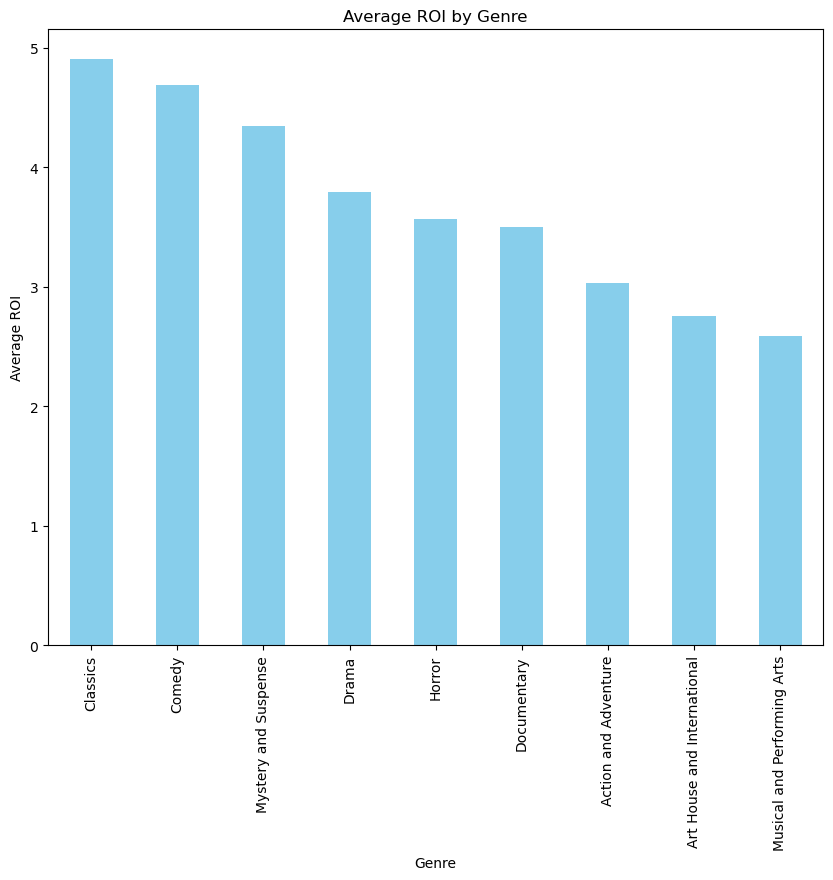

In [62]:
#create a graph to show how genres perform in the box office
# Group the data by genre and calculate the mean ROI
genre_roi = cost_info.groupby('genre1')['ROI'].mean().sort_values(ascending=False)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))

ax = genre_roi.plot(kind='bar', color='skyblue')
ax.set_title('Average ROI by Genre')
ax.set_ylabel('Average ROI')
ax.set_xlabel('Genre')
plt.show;

#### Results Interpretation

The top 3 genres that give the highest average return on investment(ROI) are:
- Classics
- Comedy
- Mystery and Suspense

#### Budget against Worlwide Gross color coded by Genre

In [63]:
#checking for correlation between worldwide gross and production budget using numpy
# Calculate the correlation between worldwide gross and production budget
correlation = np.corrcoef(cost_info['worldwide_gross'], cost_info['production_budget'])[0, 1]
print(f"The correlation between worldwide gross and production budget is {correlation.round(2)}")


The correlation between worldwide gross and production budget is 0.75


In [64]:
#Simple linear model to show the relationship between worldwide gross and production budget
# Import the linear model function from sklearn
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(cost_info[['production_budget']], cost_info['worldwide_gross'])

# Get the slope and intercept of the line
slope = model.coef_[0]
intercept = model.intercept_

# Print the slope and intercept
print(f"The slope of the line is {slope.round(2)}")
print(f"The intercept of the line is {intercept.round(2)}")


The slope of the line is 3.2
The intercept of the line is -7678293.09


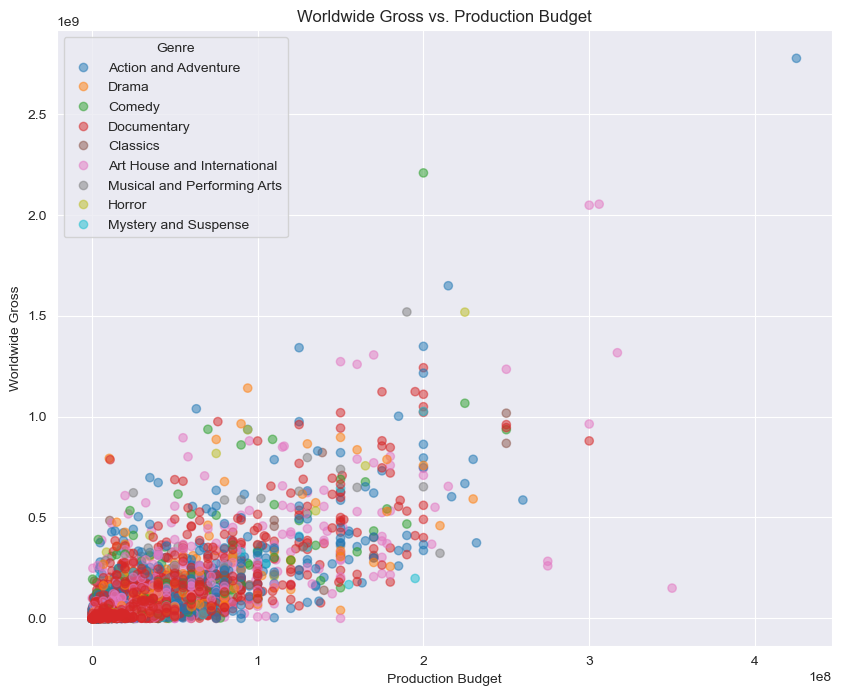

In [65]:
#graph showing distribution of worldwide gross for different genres using box plot
import seaborn as sns
sns.set_style('darkgrid')

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(cost_info['production_budget'], cost_info['worldwide_gross'], 
                     c=cost_info['genre1'].astype('category').cat.codes,cmap='tab10', alpha=0.5)

# Get unique genres and their corresponding labels
unique_genres = cost_info['genre1'].unique()
genre_labels = [str(x) for x in unique_genres]  # Convert genres to strings

# Create a legend using scatter plot elements and custom labels
plt.legend(scatter.legend_elements()[0], genre_labels, title='Genre', loc='upper left')  

# Add labels and title
ax.set_title('Worldwide Gross vs. Production Budget')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Gross')

plt.show()

#### Results Interpretation

The production budget and worldwide gross seem to have a typically linear relationship with a high positive correlation of `0.75`. This would suggest that a ` higher production budget equates to a high world wide gross`. 
From the graph above, genres such as 'Documentary' and 'Art House and International' seem to have higher budgets with lower returns whereas genres such as 'Comedy' and 'Action and Adventure' seem to have relatively lower production budgets and a higher return.

#### Time Base Analysis

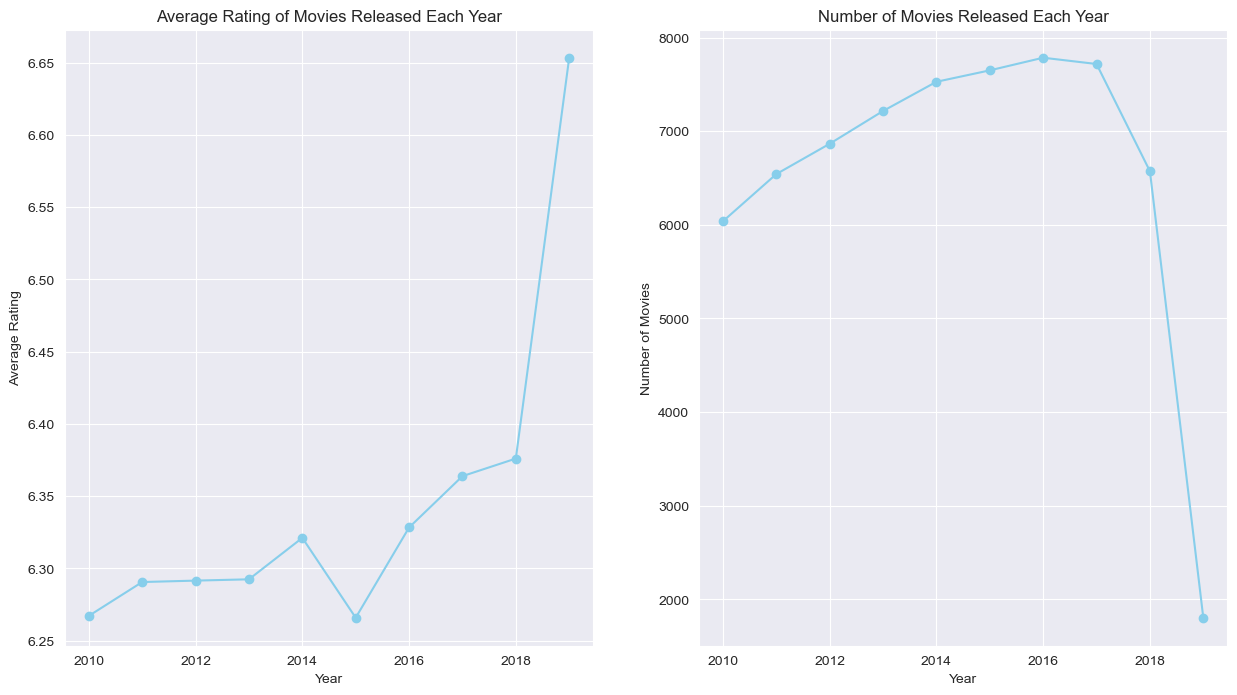

In [69]:
#line graph showing the average rating of movies released each year
# Group the data by start year and calculate the mean rating
yearly_ratings = movie_data.groupby('start_year')['averagerating'].mean()
yearly_counts = movie_data['start_year'].value_counts().sort_index()

# Create a line plot
fig, axes = plt.subplots(1,2,figsize=(15,8))
axes[0].plot(yearly_ratings.index, yearly_ratings.values, marker='o', color='skyblue')
axes[1].plot(yearly_counts.index, yearly_counts.values, marker='o', color='skyblue')

# Add labels and title
axes[0].set_title('Average Rating of Movies Released Each Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Rating')

axes[1].set_title('Number of Movies Released Each Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Movies')
plt.show();

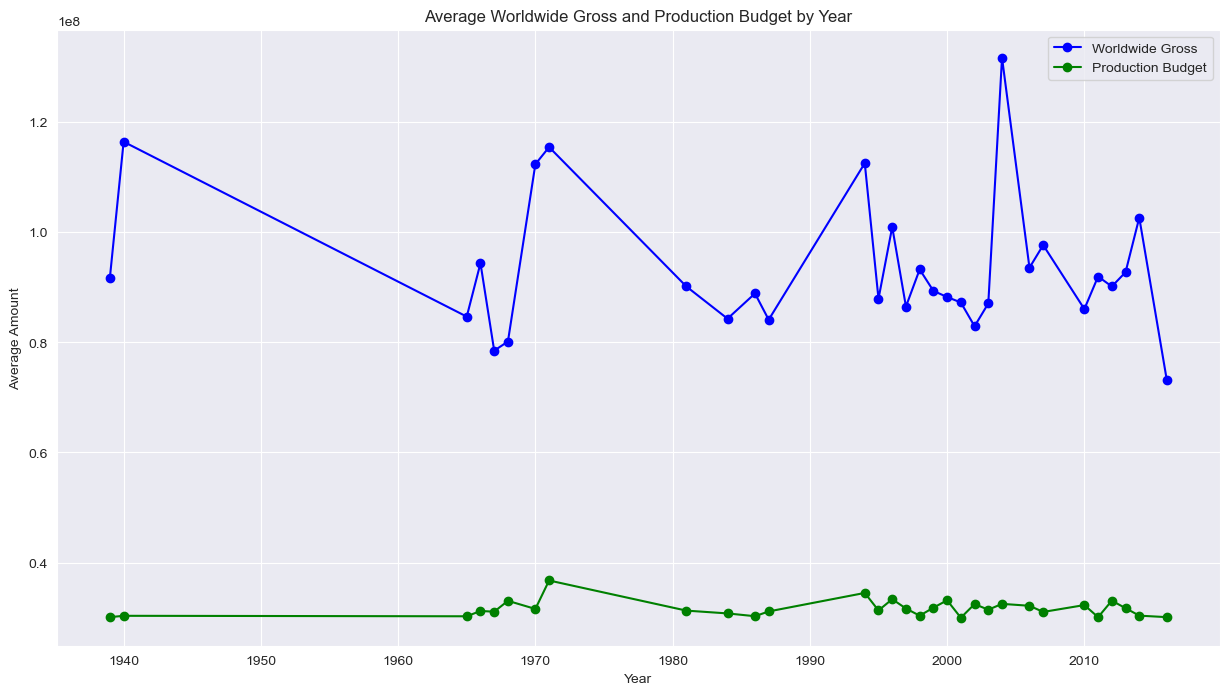

In [80]:
#line graph showing the trend of average worldwide gross and production budget over the years
# Group the data by start year and calculate the mean worldwide gross and production budget
yearly_gross = cost_info.groupby('theater_date')['worldwide_gross'].mean()
yearly_budget = cost_info.groupby('theater_date')['production_budget'].mean()

# Create a line plot
fig, axes = plt.subplots(figsize=(15,8))
axes.plot(yearly_gross.index, yearly_gross.values, marker='o', color='blue')
axes.plot(yearly_budget.index, yearly_budget.values, marker='o', color='green')

# Add labels and title
axes.set_title('Average Worldwide Gross and Production Budget by Year')
axes.set_xlabel('Year')
axes.set_ylabel('Average Amount')
axes.legend(['Worldwide Gross', 'Production Budget'])
plt.show();

In [107]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65720 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genre1           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


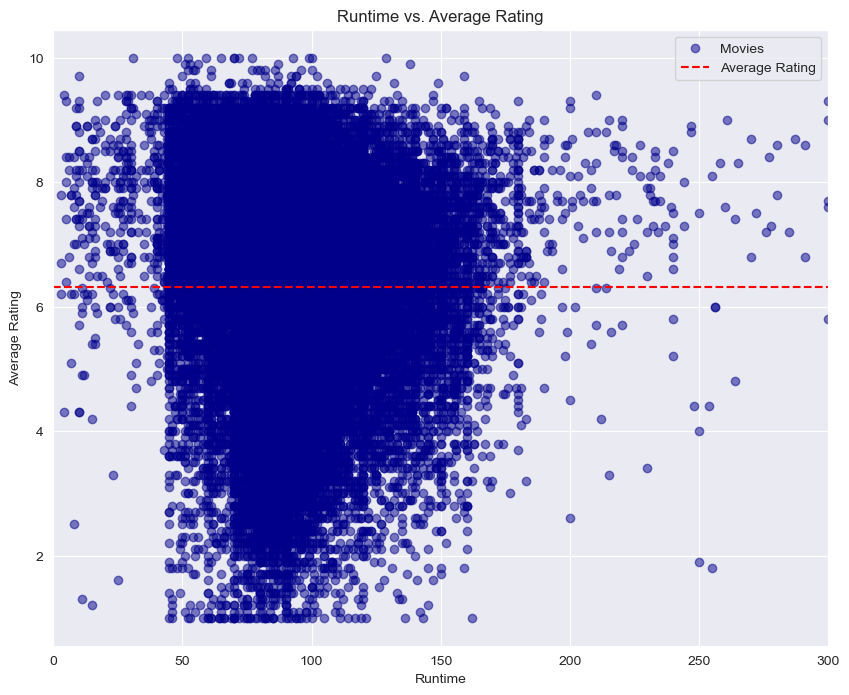

In [113]:
#scatter plot showing the relationship between runtime and average rating
# Create a scatter plot of runtime vs. average rating
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(movie_data['runtime_minutes'], movie_data['averagerating'], 
                     color='darkblue', alpha=0.5)

#add a horizontal line to show the average rating
ax.axhline(movie_data['averagerating'].mean(), color='red', linestyle='--')

# Add labels and title
ax.set_title('Runtime vs. Average Rating')
ax.set_xlabel('Runtime')
ax.set_ylabel('Average Rating')
ax.set_xlim(0,300)  # Limit the x-axis to remove outliers
ax.legend(['Movies' , 'Average Rating'])
plt.show();

---
### Conclusions
---
This analysis has yielded the following conclusions:

